Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 26 seconds.
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 25 seconds.


Analysis complete! Check the visualization and README content for interpretation.


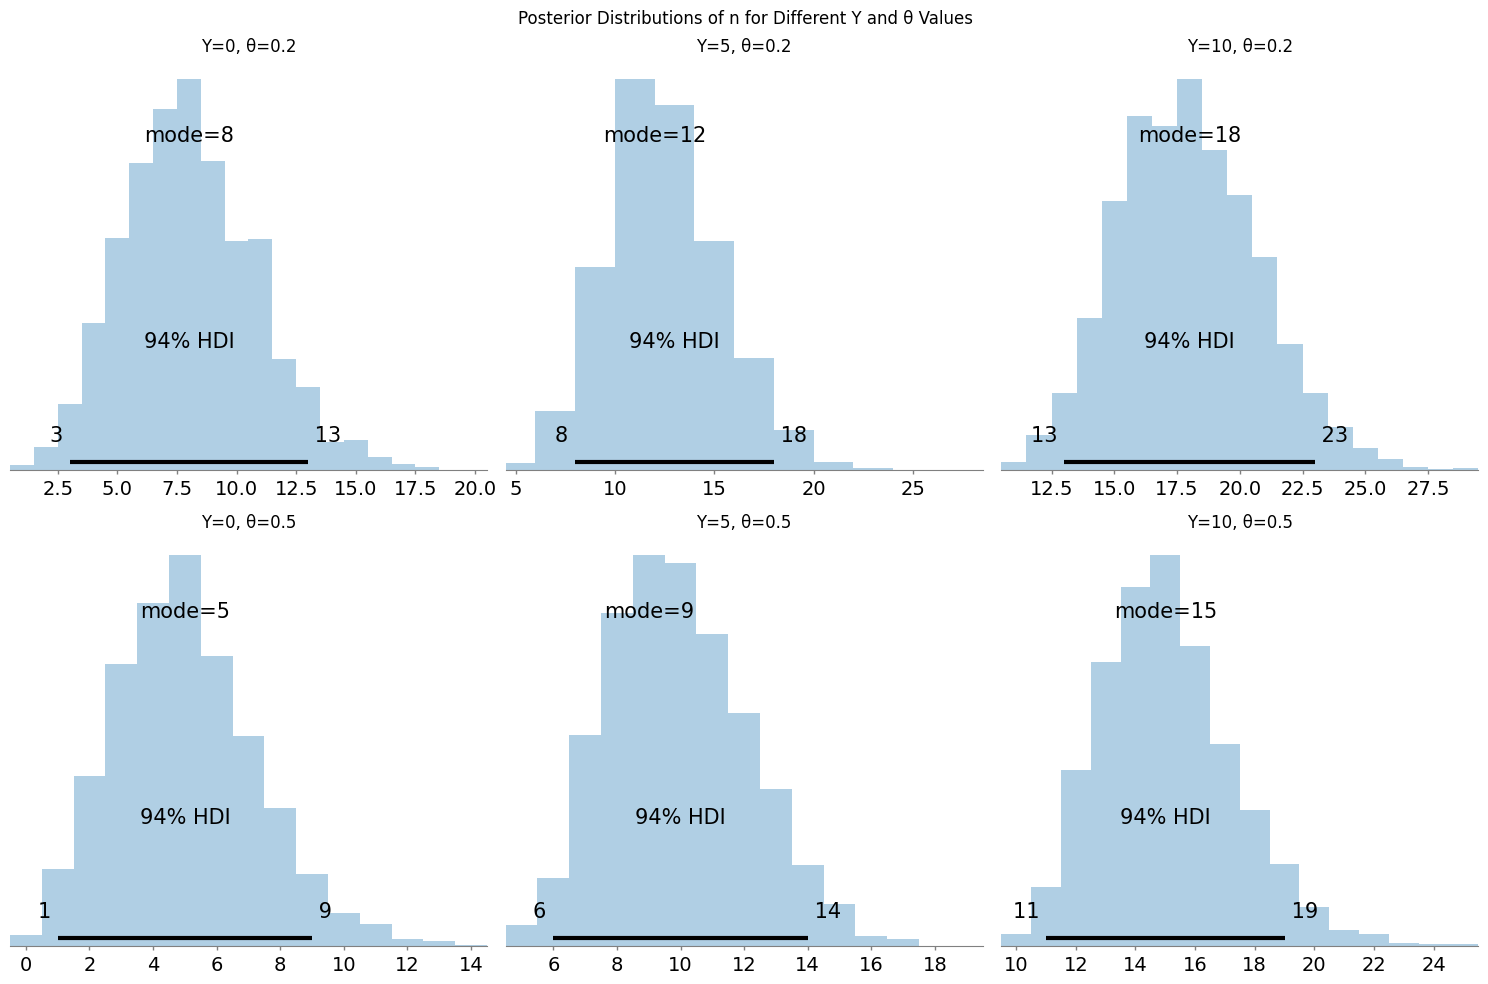

In [12]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

def create_and_sample_model(observed_y, theta):
    with pm.Model() as model:
        n = pm.Poisson('n', mu=10)
        
        y = pm.Binomial('y', n=n, p=theta, observed=observed_y)
        
        trace = pm.sample(2000, tune=1000, chains=4, return_inferencedata=True)
    
    return trace

# Create subplots for all combinations
y_values = [0, 5, 10]
theta_values = [0.2, 0.5]

fig, axes = plt.subplots(len(theta_values), len(y_values), figsize=(15, 10))
plt.suptitle('Posterior Distributions of n for Different Y and θ Values')

# Run the analysis for each combination
for i, theta in enumerate(theta_values):
    for j, y in enumerate(y_values):
        trace = create_and_sample_model(y, theta)
        
        # Plot the posterior distribution
        az.plot_posterior(
            trace, 
            var_names=['n'],
            ax=axes[i, j],
            point_estimate='mode',
            hdi_prob=0.94
        )
        axes[i, j].set_title(f'Y={y}, θ={theta}')

# Adjust layout
plt.tight_layout()
